In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve)
from sklearn.inspection import permutation_importance

In [2]:
# Загружаем датасет
df = pd.read_csv('S06-hw-dataset-01.csv')

In [3]:
# Выводим первые 5 строк данных
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [4]:
# Получаем информацию о столбцах и типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [5]:
# Выводим базовые описательные статистики для числовых признаков
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [6]:
df['target'].value_counts(normalize=True)* 100

target
0    67.658333
1    32.341667
Name: proportion, dtype: float64

In [7]:
# Проверка на пропуски
df.isnull().sum()

id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [8]:
# Типы столбцов
df.dtypes

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [9]:
# Определяем X-признаки и y-таргет
X = df.drop(columns=['id', 'target'])
y = df['target']

In [10]:
# Train/Test-сплит и воспроизводимость
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# фиксированный seed обеспечивает воспроизводимость.
# Стратификация сохраняет пропорцию классов, что предотвращает усиление перекоса на этапе обучения.

In [12]:
# Baseline’ы
results = {}

# DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
results['Dummy'] = {
    'accuracy': accuracy_score(y_test, y_pred_dummy),
    'f1': f1_score(y_test, y_pred_dummy),
    'roc_auc': roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])
}

In [13]:
# LogisticRegression
log_reg = Pipeline([('scaler', StandardScaler()),('clf', LogisticRegression(random_state=42))])
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
}


In [14]:
# Результаты
pd.DataFrame(results).T

,accuracy,f1,roc_auc
Dummy,0.676667,0.000000,0.500000
LogisticRegression,0.827500,0.707627,0.874691


In [15]:
# Модели недели 6

# Словари для хранения лучших параметров
search_summaries = {}

# DecisionTreeClassifier
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)
search_summaries['DecisionTree'] = {
    'best_params': dt_grid.best_params_,
    'best_cv_score_roc_auc': dt_grid.best_score_
}

In [16]:
# RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
search_summaries['RandomForest'] = {
    'best_params': rf_grid.best_params_,
    'best_cv_score_roc_auc': rf_grid.best_score_
}

In [17]:
# GradientBoostingClassifier
gb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='roc_auc')
gb_grid.fit(X_train, y_train)
search_summaries['GradientBoosting'] = {
    'best_params': gb_grid.best_params_,
    'best_cv_score_roc_auc': gb_grid.best_score_
}

best_model = gb_grid.best_estimator_

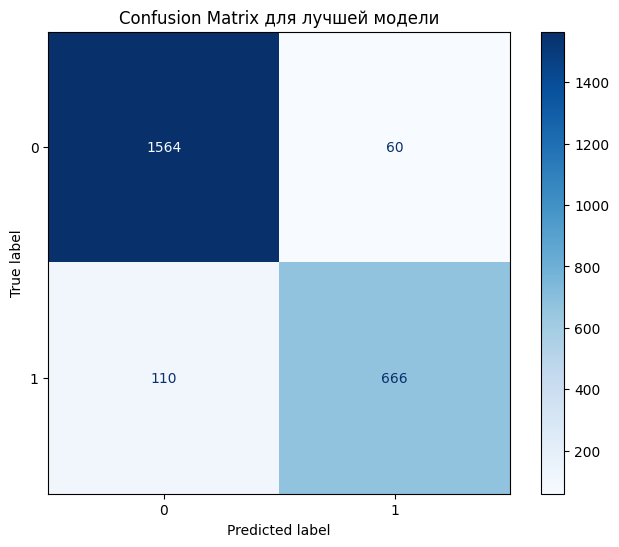

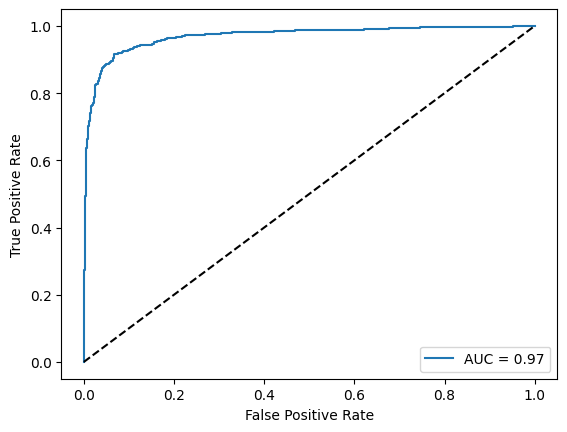

In [18]:

# Сбор финальных метрик
final_metrics = results.copy()
models = {
    'DecisionTree': dt_grid,
    'RandomForest': rf_grid,
    'GradientBoosting': gb_grid
}

for name, grid in models.items():
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]
    final_metrics[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, ax=ax, cmap='Blues'
)
plt.title("Confusion Matrix для лучшей модели")
plt.savefig('artifacts/figures/confusion_matrix.png')
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {final_metrics["GradientBoosting"]["roc_auc"]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('artifacts/figures/roc_curve.png')
plt.show()

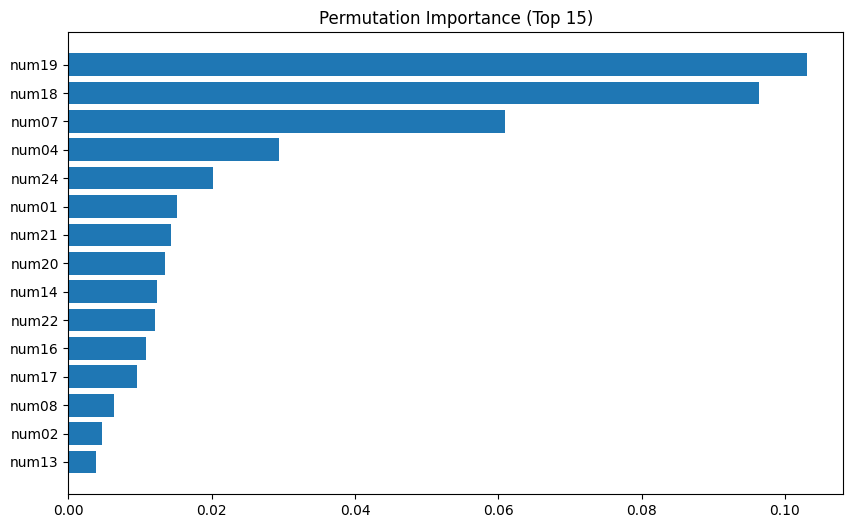

In [19]:
# Permutation Importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[-15:]

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title("Permutation Importance (Top 15)")
plt.savefig('artifacts/figures/importance.png')

# Сохранение файлов
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(final_metrics, f)

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4)

joblib.dump(best_model, 'artifacts/best_model.joblib')

best_meta = {
    'model_type': 'GradientBoosting',
    'best_params': gb_grid.best_params_,
    'test_roc_auc': final_metrics['GradientBoosting']['roc_auc']
}
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_meta, f)